# Texture

Accodrdingly to Wikipedia, the texture is :

```
the nature of a surface as defined by the three characteristics of lay, surface roughness, and waviness
```

We can simplify it and just tell it's a pattern repeated over and over...

There are some exemple of texture : 

![texture exemple](./imgs/fig_sample.png)


## Libararies

In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
from matplotlib import gridspec

from skimage import io
from skimage import color
from skimage import filters
from skimage import feature
from skimage import data

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Fourrier Transform

As I just simplified the texture definition as a simple repetition of a pattern over and over we can see the final image as a periodic signal where a period contain the pattern.

Also, perdiodic signals and _fourrier transform_ are highly correlated.

Let's do a quick exploration...

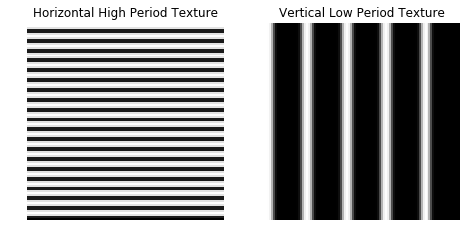

In [2]:
#make an horizontal high period image
im_1 = np.zeros((100, 100))
im_1[np.array([i for i in range(100) if i % 5 in [0, 1, 2]])] = 1
im_1 = filters.gaussian(im_1, sigma=.5) #blur it

#make an vertical low periodic
im_2 = np.zeros((100, 100))
im_2[np.array([i for i in range(100) if i % 20 in range(5)])] = 1
im_2 = im_2.T
im_2 = filters.gaussian(im_2) #blur it

#display them
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(1, 3)

ax = fig.add_subplot(gs[0, 0])
ax.set_title("Horizontal High Period Texture")
ax.axis('off')
ax.imshow(im_1, cmap='gray')

ax = fig.add_subplot(gs[0, 1])
ax.set_title("Vertical Low Period Texture")
ax.axis('off')
ax.imshow(im_2, cmap='gray')

fig.show()

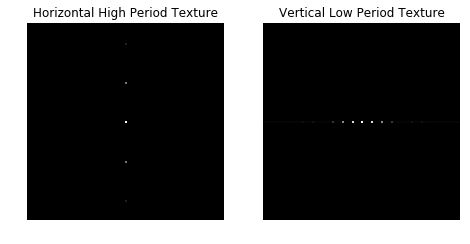

In [3]:
#let's do a fourrier transform over those patterns

fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(1, 3)

ax = fig.add_subplot(gs[0, 0])
ax.set_title("Horizontal High Period Texture")
ax.axis('off')
ax.imshow(abs(np.fft.fftshift(np.fft.fft2(im_1))), cmap='gray')

ax = fig.add_subplot(gs[0, 1])
ax.set_title("Vertical Low Period Texture")
ax.axis('off')
ax.imshow(abs(np.fft.fftshift(np.fft.fft2(im_2))), cmap='gray')

fig.show()


As we can see, as the points are far from the center mean the frequency is high. 
In an other hand, points points nearto the center mean a low period.

The horizontal vs vertical axis inform us about the main direction of the pattern.

We can see with this simple image how the texture can be represented in a fourrier space...

There are some more real world image :

![fourrier images](./imgs/slide_42.jpg)

## LBP Texture Descriptor

The _**L**ocal **B**inary **P**atern_ is a well known image descriptor. It gives informations about the texture of the information. It was even used in old facial recognition programs.

It is computed as bellow : 

![lbp computation](./imgs/LBP.png)

![lbp computation 2](./imgs/lbp2.png)

The advantage of this descriptor is its invariance to the light. Indeed there is a loss of information when for each neighbor of the centra pixel of the patch we only keep if it's greater or lower than the value (not how much).

We can see its robustness to the light bellow : 

![lbp light](./imgs/lbp_yale.jpg)

Once the LBP is computed on an image, we can build an histogram about how many times each LBP value appear.
This global histogram will describe the texture of the whole image, but sometimes we want to keep some information about the localisation of the texture. The idea is to cut the image in blocks, compute each blocks histograms and concatenate them as shown bellow : 

![lbp block image](./imgs/lbp_facerecognition.jpg)

This method will give us for each image a vector of the same dimension also we can give it as input of a classifier. We will try it few cells bellow...

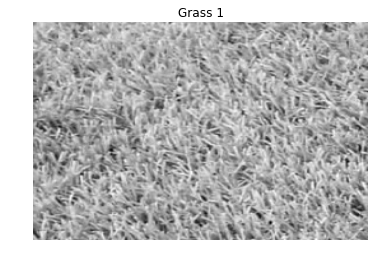

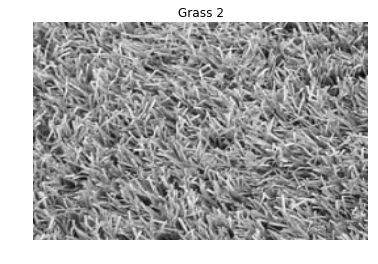

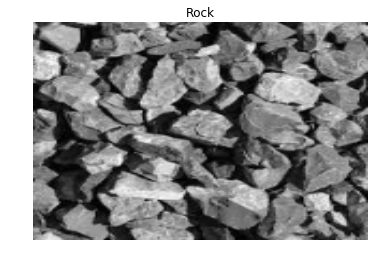

In [4]:
grass_1 = io.imread("imgs/grass_1.png", as_grey=True)
grass_2 = io.imread("imgs/grass_2.png", as_grey=True)
rock = io.imread("imgs/rock.png", as_grey=True)

plt.title("Grass 1")
plt.axis("off")
plt.imshow(grass_1, cmap='gray', interpolation='bilinear', aspect='auto')
plt.show()

plt.title("Grass 2")
plt.axis("off")
plt.imshow(grass_2, cmap='gray', interpolation='bilinear', aspect='auto')
plt.show()

plt.title("Rock")
plt.axis("off")
plt.imshow(rock, cmap='gray', interpolation='bilinear', aspect='auto')
plt.show()

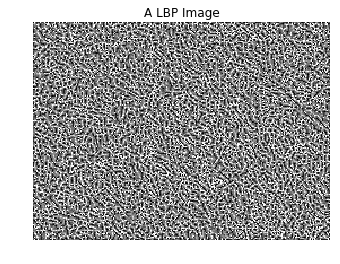

In [5]:
radius = 1
n_points = 8 * radius

grass_1_lbp = feature.local_binary_pattern(grass_1, n_points, radius, 'uniform')

plt.title("A LBP Image")
plt.axis("off")
plt.imshow(grass_1_lbp, cmap='gray')
plt.show()

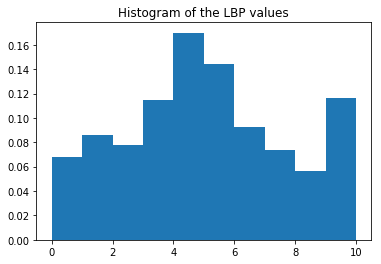

In [6]:
nb_bins = int(grass_1_lbp.max() + 1) 
plt.title("Histogram of the LBP values")
plt.hist(grass_1_lbp.ravel(), normed=True, bins=nb_bins, range=(0, nb_bins))
plt.show()

We can see that grass1 and grass2 are more similar than rock...


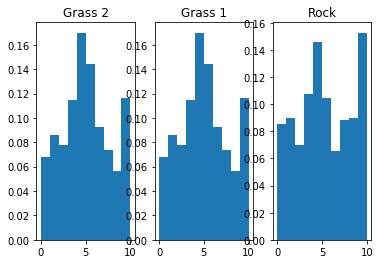

In [7]:
#compare the grass_1 image with the grass_2 and the rock
grass_2_lbp = feature.local_binary_pattern(grass_1, n_points, radius, 'uniform')
rock_lbp    = feature.local_binary_pattern(rock,    n_points, radius, 'uniform')


fig = plt.figure()#figsize=(7, 5))
gs = gridspec.GridSpec(1, 3)

ax = fig.add_subplot(gs[0, 0])
ax.set_title("Grass 2")
plt.hist(grass_2_lbp.ravel(), normed=True, bins=nb_bins, range=(0, nb_bins))

ax = fig.add_subplot(gs[0, 1])
ax.set_title("Grass 1")
plt.hist(grass_1_lbp.ravel(), normed=True, bins=nb_bins, range=(0, nb_bins))

ax = fig.add_subplot(gs[0, 2])
ax.set_title("Rock")
plt.hist(rock_lbp.ravel(), normed=True, bins=nb_bins, range=(0, nb_bins))

fig.show()

print("We can see that grass1 and grass2 are more similar than rock...")


For more about LBP take a look to the sklearn example [here](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_local_binary_pattern.html)...

### Exercice

The `imgs` dir contains 2 other dirs : `positives` and `negatives`. Each of those dir contains 100 images. 

Those images where sampled for a past kaggle competition. 
The full database (around 2go is available [here](https://www.kaggle.com/c/invasive-species-monitoring/data)).
For computationnal time reason we will only use 200 images...


- **Positive** example : ![positive example](./imgs/positives/1.jpg)
- **Negative** example : ![negative example](./imgs/negatives/1.jpg)



The goal of this exercice is to classify if an image contains _hortensias_ with the **LBP** texture descriptor ! 😃

To do so:

1. load the images
2. split the base in a training and testing base
3. compute the LBP histograms as upper
4. train a SVM classifier (`from sklearn.svm import SVC`)
5. test the classifier (the accuracy should be near from 80% as seen [here](https://www.kaggle.com/vievie31/invasive-species-monitoring-lbp-descriptor) -- take a look only if stuck this code is ugly !! -- )

Good luck ! 

In [ ]:
#TODO: classify with texture if the image contains hortensias